In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

cars = pd.read_csv("/content/cars_engage_20221.csv")

In [ ]:
cars

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


### **DATA CLEANING**

Removing NaN Values

In [ ]:
cars.isnull().sum()

Unnamed: 0              0
Make                    0
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [ ]:
cars.dropna(axis =1, inplace=True)
cars.drop("Unnamed: 0", axis =1, inplace=True)
cars.isnull().sum()

Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
Fuel_Type            0
Length               0
Power                0
dtype: int64

In [ ]:
cars.head(2)

,Make,Model,Variant,Ex-Showroom_Price,Fuel_Type,Length,Power
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",Petrol,3164 mm,38PS@5500rpm
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",Petrol,3164 mm,38PS@5500rpm


### **DATA ANALYSIS**

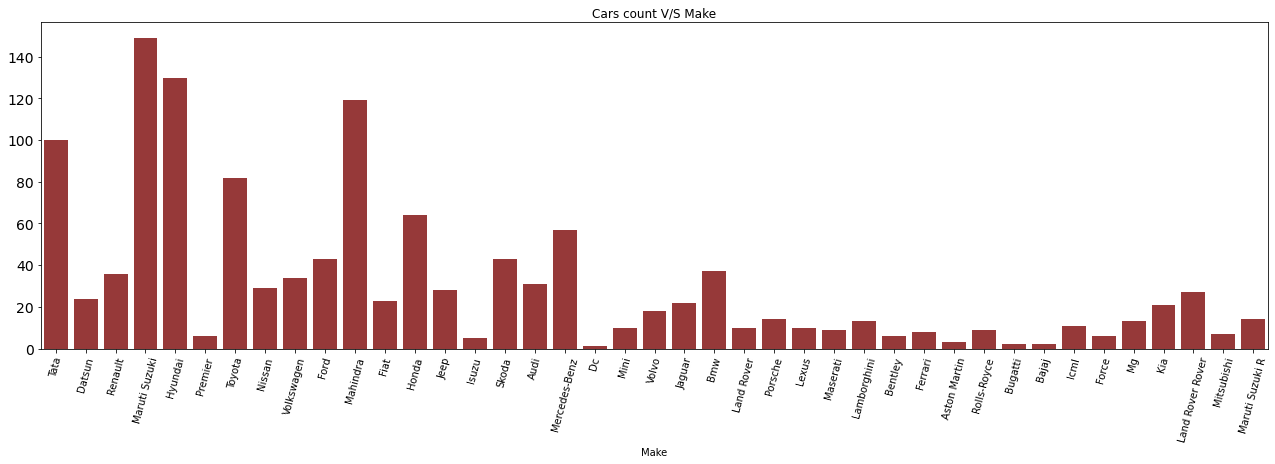

In [ ]:
# Most Sold Make

plt.figure(figsize=(22,6))
cars_make = sns.countplot(data=cars, x='Make',color='brown')
plt.title('Cars count V/S Make')
plt.xticks(fontsize=10, rotation = 75)
plt.yticks(fontsize=14)
plt.ylabel('');

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text major ticklabel objects>)

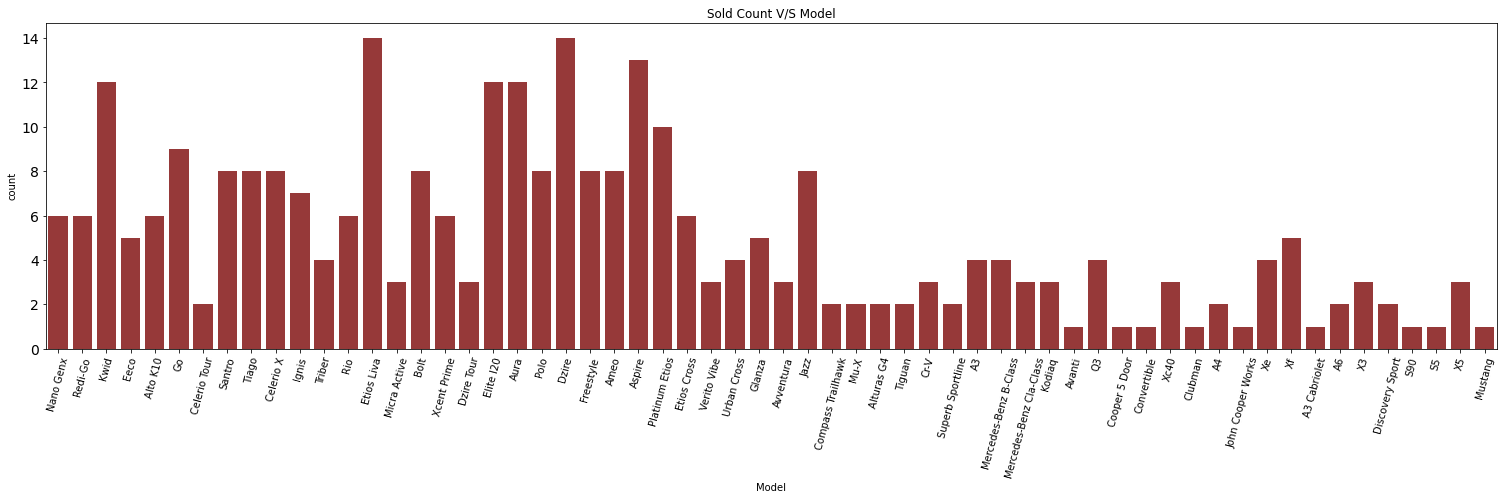

In [ ]:
# Most Sold Model

# Slicing Model data to Ex-Showroom_Price less than ₹ 75,00,000 since most of the buyers buy cars under this range

cars_s = cars.iloc[0:299, 1:2]
plt.figure(figsize=(26,6))
sns.countplot(data=cars_s, x='Model',color='brown')
plt.title('Sold Count V/S Model')
plt.xticks(fontsize=10, rotation = 75)
plt.yticks(fontsize=14)

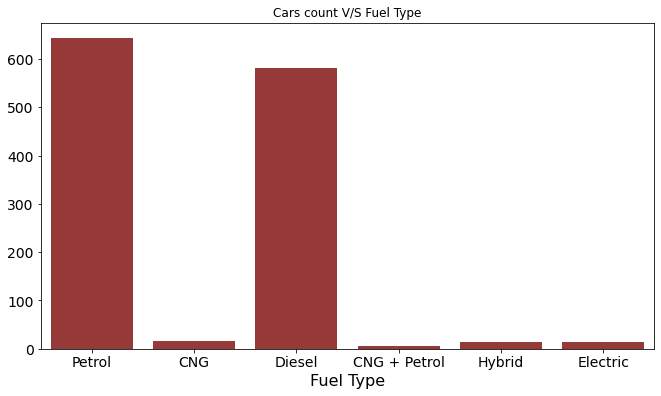

In [ ]:
plt.figure(figsize=(11,6))
sns.countplot(data=cars, x='Fuel_Type',color='brown')
plt.title('Cars count V/S Fuel Type')
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

In [ ]:
# Changing Ex-Showroom_Price and Length from string to float data type
cars["Ex-Showroom_Price"] = cars["Ex-Showroom_Price"].str.replace("[Rs. ]","") 
cars["Ex-Showroom_Price"] = cars["Ex-Showroom_Price"].str.replace("[,]","") 
cars = cars.astype({'Ex-Showroom_Price':'float'}) 

cars["Length"] = cars["Length"].str.replace("[ mm]","") 
cars = cars.astype({'Length':'float'}) 

# Splitting Power into HP (Horse Power) and RPM; and converting their data type from string to float

new = cars["Power"].str.split("@", n = 1, expand = True)
cars["HP"]= new[0]
cars["RPM"]= new[1]
cars.drop(columns =["Power"], inplace = True)

cars["HP"] = cars["HP"].str.replace("[PS]","")
cars["HP"] = cars["HP"].str.replace("[bhp]","")
cars["HP"] = cars["HP"].str.replace("[s]","")
cars["HP"] = cars["HP"].str.replace("[B ]","")
cars["HP"] = cars["HP"].str.replace("[ps]","")
cars["HP"] = cars["HP"].str.replace("[H]","") 
cars["HP"] = cars["HP"].str.replace("[1600Nm]","2") #Torque converted into ps


cars["HP"] = cars["HP"].str.replace("[kW]","") 
cars = cars.astype({'HP':'float'}) 

cars.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default 

Make                  0
Model                 0
Variant               0
Ex-Showroom_Price     0
Fuel_Type             0
Length                0
HP                    0
RPM                  19
dtype: int64

In [ ]:
cars.dropna(axis =1, inplace =True)
cars.isnull().sum()

Make                 0
Model                0
Variant              0
Ex-Showroom_Price    0
Fuel_Type            0
Length               0
HP                   0
dtype: int64

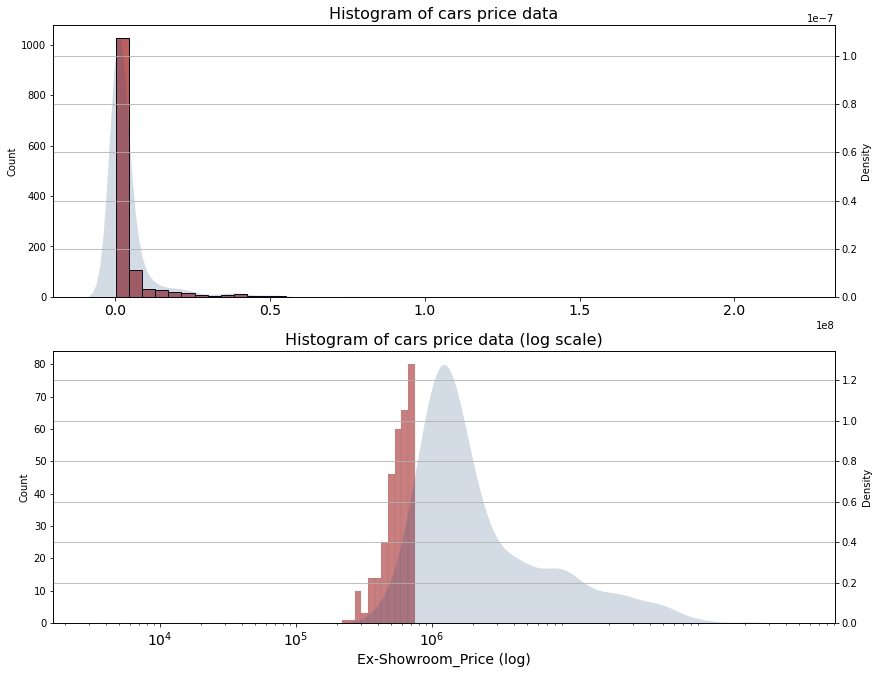

In [ ]:
# PLotting graphs for count based on the Ex-Showroom Price, plotting normal and log graphs due to huge difference in prices

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=cars, x='Ex-Showroom_Price',bins=50, color='brown', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=cars, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=cars, x='Ex-Showroom_Price',bins=logbins,alpha=.6, color='brown',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=cars, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Ex-Showroom_Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

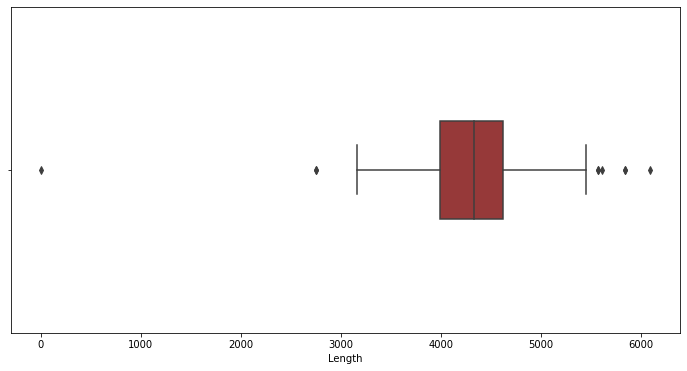

In [ ]:
# Range of length of car which were sold

plt.figure(figsize=(12,6))
sns.boxplot(data=cars, x='Length',width=.3,color='brown')

<function matplotlib.pyplot.show>

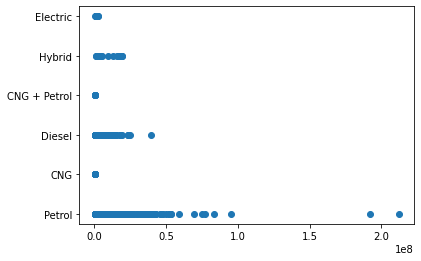

In [ ]:
# Determining what Fuel Type was sold at what price range

plt.scatter(cars['Ex-Showroom_Price'], cars['Fuel_Type'])
plt.show

### **Server Connection**

If the following code doesn't run, uncomment below code, Restart Runtime and re-run entire code again.

In [ ]:
# pip install anvil-uplink

In [ ]:
import anvil.server
import anvil.mpl_util

anvil.server.connect("Q5J5GSVAXNQZAAEKPYRKWMOG-P57AXF6NWFMKFXL4")                        #Anvil Uplink Key for connection with the web app.

Defining functions for graphs to be called in webapp's display.
`@anvil.server.callable` -> defines that the next function is available to called by Anvil's webserver.

In [ ]:
@anvil.server.callable
def plot_carsMake():
    
  # Plot it in the normal Matplotlib way
  plt.figure(figsize=(22,6))
  sns.countplot(data=cars, x='Make',color='brown')
  plt.title('Cars count V/S Make')
  plt.xticks(fontsize=10, rotation = 75)
  plt.yticks(fontsize=14)
  plt.ylabel('')
  
  # Return this plot as a PNG image in a Media object
  return anvil.mpl_util.plot_image()

@anvil.server.callable
def plot_carsFuel():
  plt.figure(figsize=(11,6))
  sns.countplot(data=cars, x='Fuel_Type',color='brown')
  plt.title('Cars count V/S Fuel Type')
  plt.xlabel('Fuel Type', fontsize=16)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.ylabel('')

  return anvil.mpl_util.plot_image()

@anvil.server.callable
def scatter_carsFuel():
  plt.figure(figsize=(11,6))
  plt.scatter(cars['Ex-Showroom_Price'], cars['Fuel_Type'])
  plt.title('Fuel Type V/S Ex-Showroom_Price')

  return anvil.mpl_util.plot_image()

@anvil.server.callable
def price_check():
  fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
  sns.histplot(data=cars, x='Ex-Showroom_Price',bins=50, color='brown', ax=ax1)
  ax12 = ax1.twinx()
  sns.kdeplot(data=cars, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
  ax12.grid()
  ax1.set_title('Histogram of cars price data',fontsize=16)
  ax1.set_xlabel('')
  logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
  sns.histplot(data=cars, x='Ex-Showroom_Price',bins=logbins,alpha=.6, color='brown',ax=ax2)
  ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
  ax2.set_xscale('log')
  ax22 = ax2.twinx()
  ax22.grid()
  sns.kdeplot(data=cars, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
  ax2.set_xlabel('Ex-Showroom_Price (log)', fontsize=14)
  ax22.set_xticks((800,1000,10000,100000,1000000))
  ax2.xaxis.set_tick_params(labelsize=14);
  ax1.xaxis.set_tick_params(labelsize=14);

  return anvil.mpl_util.plot_image()

@anvil.server.callable
def mostSold():
  cars_s = cars.iloc[0:299, 1:2]
  plt.figure(figsize=(28,6))
  sns.countplot(data=cars_s, x='Model',color='brown')
  plt.title('Sold Count V/S Model')
  plt.xticks(fontsize=10, rotation = 75)
  plt.yticks(fontsize=14)

  return anvil.mpl_util.plot_image()

### **Generating Model**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(cars["Fuel_Type"])
list(le.classes_)

['CNG', 'CNG + Petrol', 'Diesel', 'Electric', 'Hybrid', 'Petrol']

In [ ]:
fuel = le.transform(cars["Fuel_Type"])
fuel

array([5, 5, 0, ..., 5, 5, 2])

In [ ]:
Fuel_lbl = pd.DataFrame(fuel, columns = ['Fuel'])
Fuel_lbl

,Fuel
0,5
1,5
2,0
3,5
4,5
...,...
1271,2
1272,2
1273,5
1274,5


In [ ]:
Fuel_Type = cars["Fuel_Type"]
cars.drop("Fuel_Type", axis =1, inplace =True)
cars = pd.concat([cars, Fuel_lbl, Fuel_Type], axis =1)      #Added Fuel_Type again to let the webserver plot graphs and it will NOT interupt input's defination while training.
cars

,Make,Model,Variant,Ex-Showroom_Price,Length,HP,Fuel,Fuel_Type
0,Tata,Nano Genx,Xt,292667.0,3164.0,38.0,5,Petrol
1,Tata,Nano Genx,Xe,236447.0,3164.0,38.0,5,Petrol
2,Tata,Nano Genx,Emax Xm,296661.0,3164.0,38.0,0,CNG
3,Tata,Nano Genx,Xta,334768.0,3164.0,38.0,5,Petrol
4,Tata,Nano Genx,Xm,272223.0,3164.0,38.0,5,Petrol
...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1302000.0,4440.0,222.0,2,Diesel
1272,Honda,City,Zx Mt Diesel,1421000.0,4440.0,222.0,2,Diesel
1273,Honda,City,Zx Cvt Petrol,1431000.0,4440.0,229.0,5,Petrol
1274,Honda,City,V Cvt Petrol,1201000.0,4440.0,229.0,5,Petrol


In [ ]:
dataset = cars.values

x = dataset[:,[3, 4, 5, 6]]           #Fuel_Type is excluded because it's not numeric, label encoded Fuel is being considered instead.
y = dataset[:,:3]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.8)

print(x)
print("-------------------")
print(y)

[[292667.0 3164.0 38.0 5]
 [236447.0 3164.0 38.0 5]
 [296661.0 3164.0 38.0 0]
 ...
 [1431000.0 4440.0 229.0 5]
 [1201000.0 4440.0 229.0 5]
 [6862560.0 4900.0 222.0 2]]
-------------------
[['Tata' 'Nano Genx' 'Xt']
 ['Tata' 'Nano Genx' 'Xe']
 ['Tata' 'Nano Genx' 'Emax Xm']
 ...
 ['Honda' 'City' 'Zx Cvt Petrol']
 ['Honda' 'City' 'V Cvt Petrol']
 ['Mitsubishi' 'Montero' '3.2 At']]


Defining Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors =3, metric ='euclidean')

In [ ]:
clf.fit(x, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
clf.predict([[256000, 3500, 40, 5]])

#             [Budget,length,HP,Fuel]   

array([['Tata', 'Nano Genx', 'Qcar']], dtype=object)

In [ ]:
clf.predict(x)

array([['Tata', 'Nano Genx', 'Emax Xm'],
       ['Tata', 'Nano Genx', 'Qcar'],
       ['Maruti Suzuki', 'Alto', 'Emax Xm'],
       ...,
       ['Honda', 'City', 'Monte Carlo 1.5 Tdi At'],
       ['Honda', 'Captur', '1.4 Crdi S'],
       ['Bmw', '6-Series', '3.2 At']], dtype=object)

Exchanging data from webserver with the model and proving result on the web application

In [ ]:
@anvil.server.callable

def exploreCar(budget, length, hp, fuel):
  prediction = clf.predict([[budget, length, hp, fuel]])
  
  return prediction